# Визуальный анализ данных c R

In [1]:
df <- read.csv('howpop_train.csv')

mydate = as.POSIXlt(df$published)
df$year = mydate$year
df$month = mydate$mon
df$day = mydate$mday
df$dayofweek = mydate$wday
df$hour = mydate$hour

library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.3"

1. В каком месяце (и какого года) было больше всего публикаций?

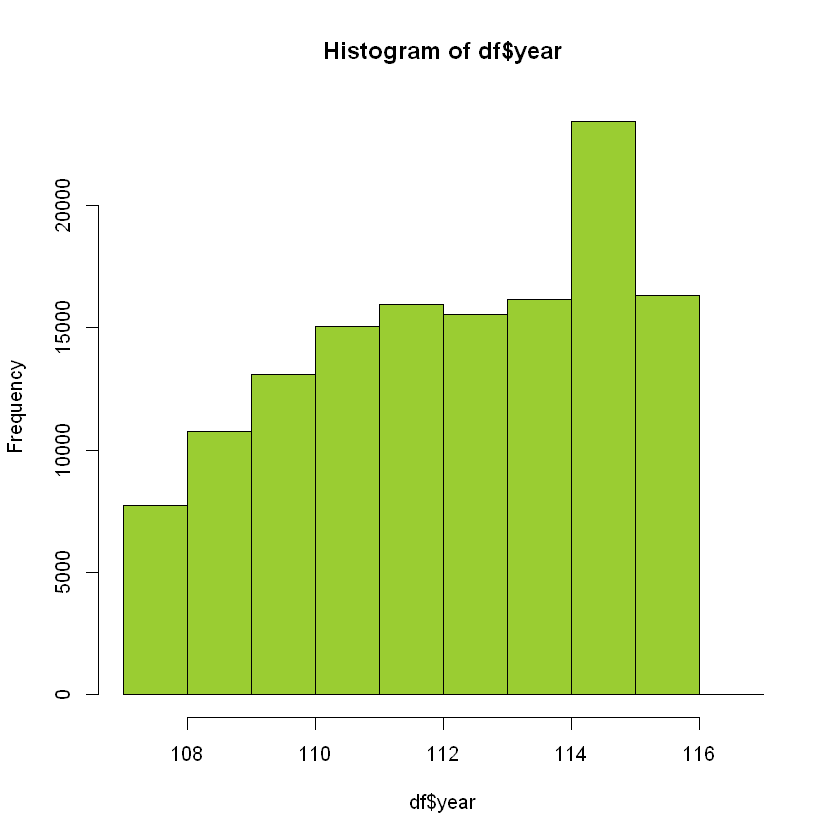

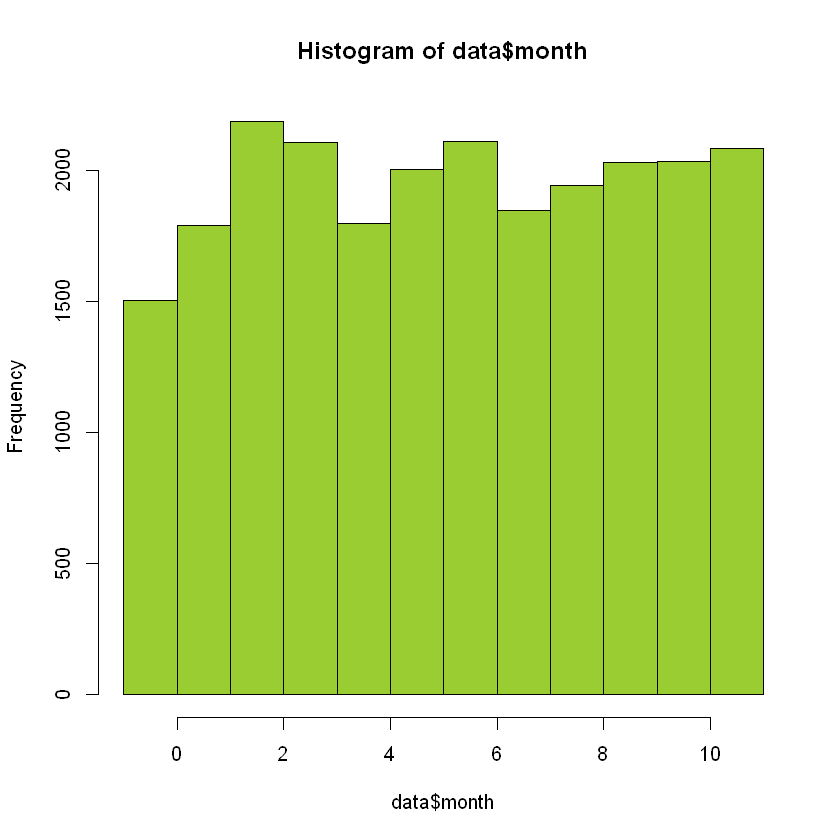

In [2]:
hist(df$year, breaks = seq(107,117,1), col="olivedrab3")
data <- subset(df, df$year == 115,select = c("content_len","comments","favs","views","votes_plus","votes_minus", "month","year","day","dayofweek","hour"))
hist(data$month, breaks = seq(-1,11,1), col="olivedrab3")

2. Проанализируйте публикации в месяце из предыдущего вопроса

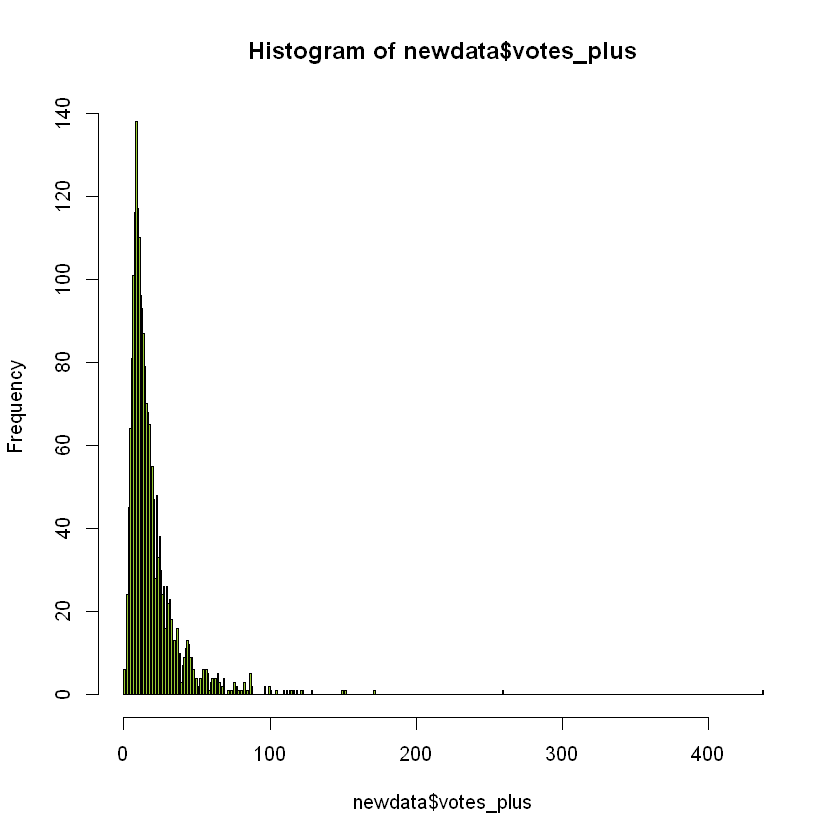

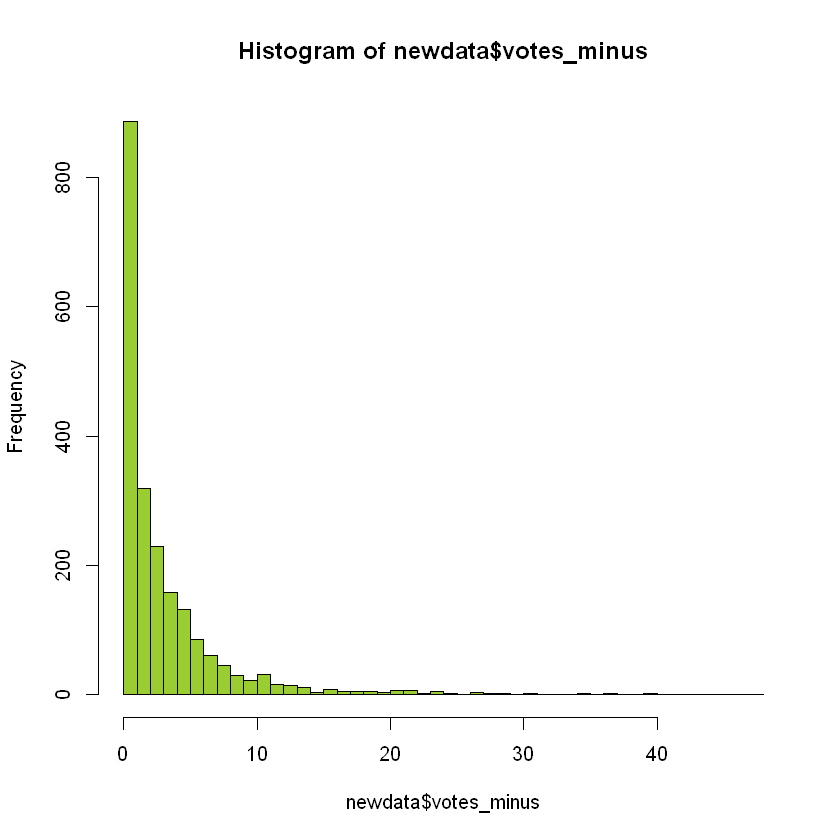

In [3]:
data <- subset(df, df$month == 3,select = c("content_len","comments","favs","views","votes_plus","votes_minus", "month","year","day","dayofweek","hour"))
newdata<- subset(data, data$year == 115,select = c("content_len","comments","favs","views","votes_plus","votes_minus", "month","year","day","dayofweek","hour"))
hist(newdata$votes_plus, breaks = seq(0,438,1), col="olivedrab3")
hist(newdata$votes_minus, breaks = seq(0,48,1), col="olivedrab3")

3. Когда лучше всего публиковать статью?

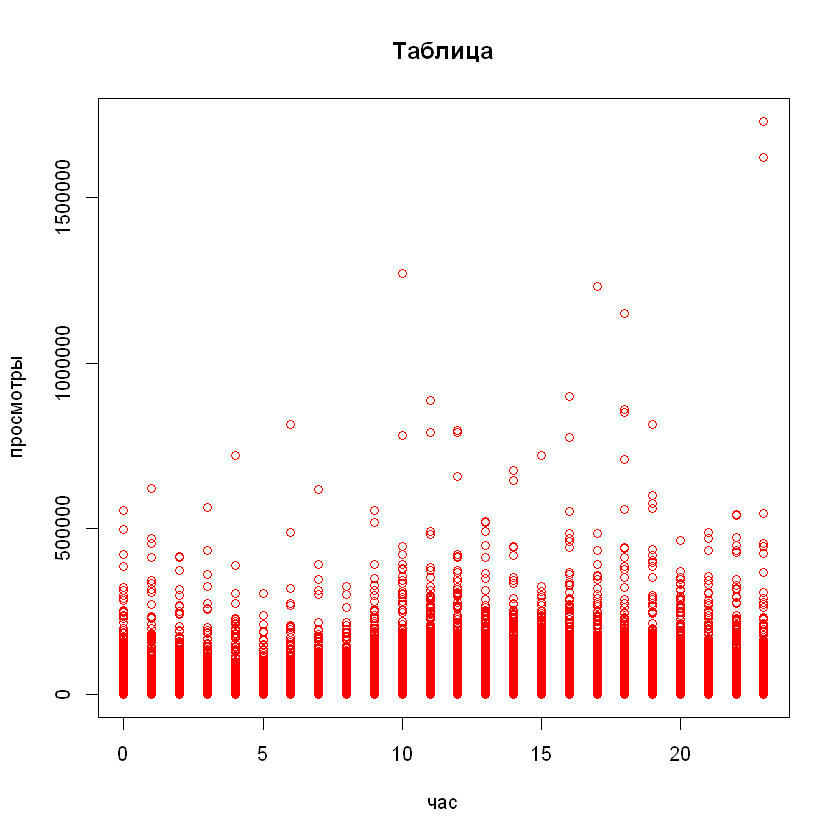

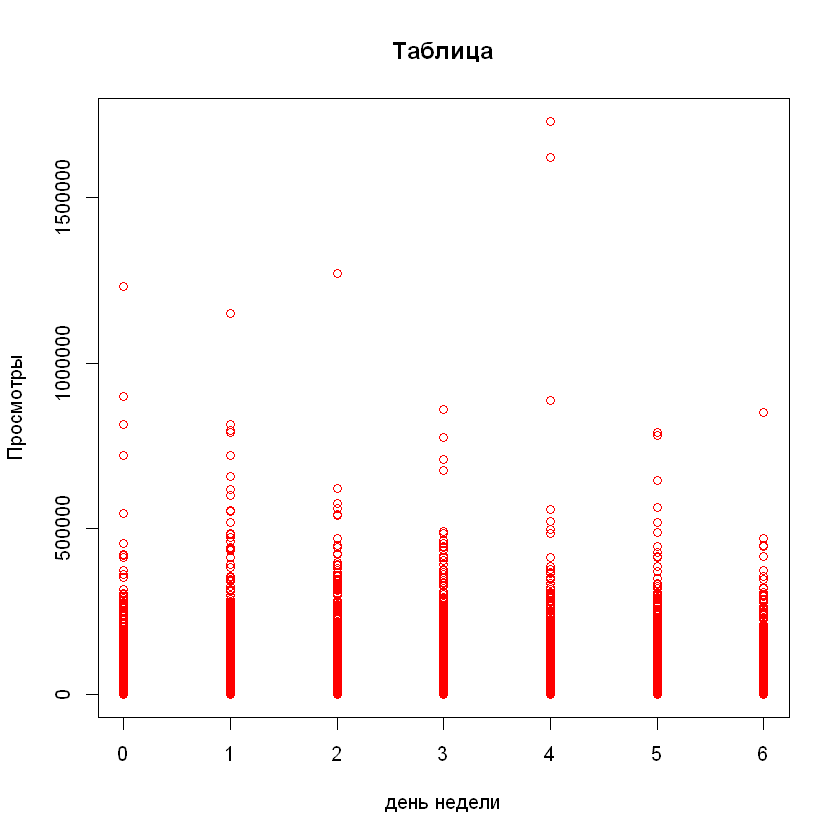

In [4]:
plot(df$hour, 
     df$views,
     col="red", 
     xlab="час", 
     ylab = "просмотры", 
     main = "Таблица")

plot(df$dayofweek,  
     df$views,
     col="red", 
     xlab="день недели", 
     ylab = "Просмотры", 
     main = "Таблица")

4. Кого из топ-20 авторов чаще всего минусуют?

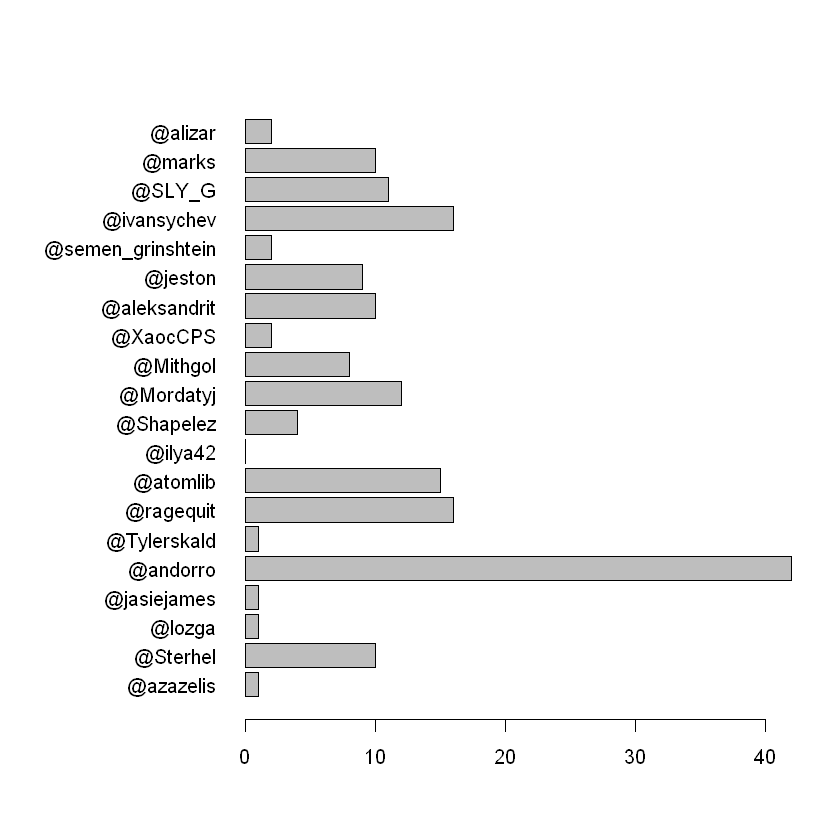

In [5]:
b <- as.data.frame(table(df$author))
new <- b[ -1, ] 
graph <- new[order(new$Freq,decreasing = TRUE),]
a = head(graph,n = 20L)
v <- unstack(a)
rec = v[,1]

v$votes_minus = 0
v$factor = factor(v$res)
for(i in 1:20){
	author = rec[i]
	idx = match(author,df$author)
	v$votes_minus[i] = df$votes_minus[idx]
}

default = par("mar") # запишем текущее значение, чтобы восстановить его потом
par(mar = c(5, 10, 4, 2)) # увеличим поле left до 10 условных единиц

barplot(v$votes_minus, names.arg = v$factor, horiz = TRUE, las = 1)

5. Сравните субботы и понедельники

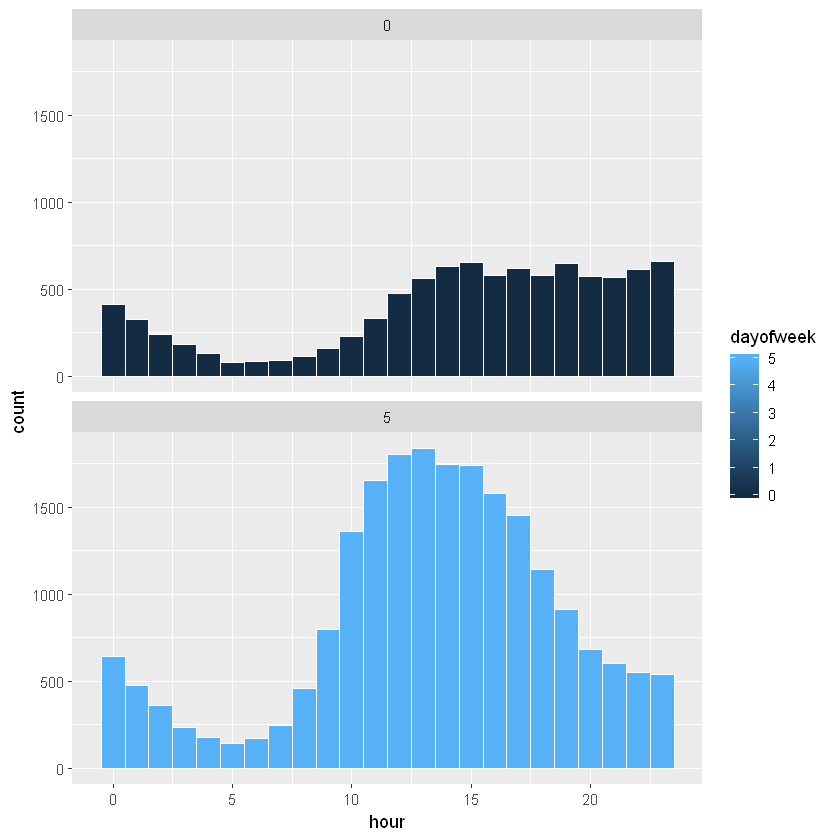

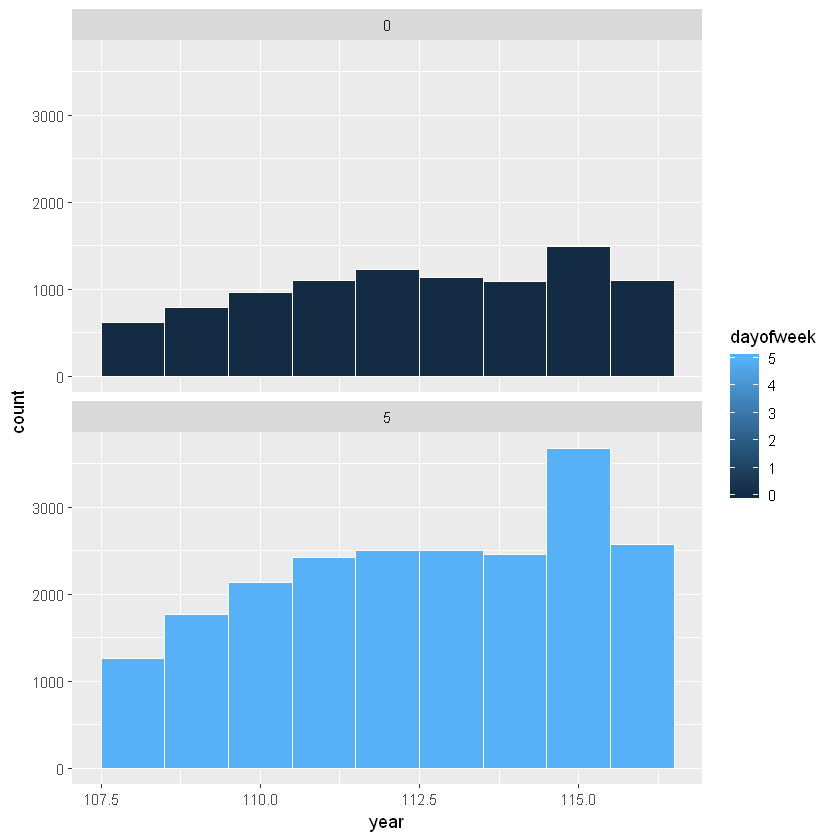

In [6]:
aq = df
aq <- subset(df, dayofweek != 1)
aq = df
aq <- subset(aq, dayofweek != 1)
aq <- subset(aq, dayofweek != 2)
aq <- subset(aq, dayofweek != 3)
aq <- subset(aq, dayofweek != 4)
aq <- subset(aq, dayofweek != 6)
g15 <- ggplot(aq, aes(x=hour)) +
   geom_histogram(binwidth=1, aes(fill=dayofweek), color="white")+
   facet_wrap(~dayofweek, ncol=1)
g15
g16 <- ggplot(aq, aes(x=year)) +
   geom_histogram(binwidth=1, aes(fill=dayofweek), color="white")+
   facet_wrap(~dayofweek, ncol=1)
g16